## **Linear Regression with Python**
Python Scikit-Learn library for machine learning can be used to implement regression functions. This is a simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves two variables.

In [1]:
# This task will require files to be downloaded from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries for dataset analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# File Path in Drive
file = '/content/drive/MyDrive/Sparks-Internship/Task 1/student_scores.csv'

# Use pandas to read .csv file into a dataframe
df = pd.read_csv(file)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# See information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# See summary statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


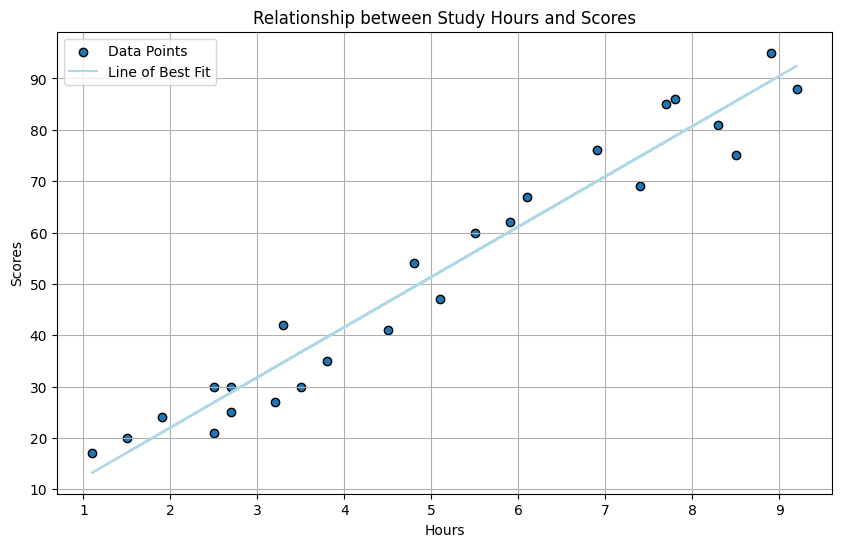

In [6]:
# Use matplotlib to plot a scatter plot of the distribution of the Scores with Hours along with a line of best fit

plt.figure(figsize=(10,6))

plt.scatter(df['Hours'],df['Scores'],edgecolor='black',label='Data Points')

# Calculate the line of best fit
m, b = np.polyfit(df['Hours'],df['Scores'],1)

plt.plot(df['Hours'], m*df['Hours']+b,color='lightblue',label='Line of Best Fit')

plt.title("Relationship between Study Hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.legend()

plt.show()

In [7]:
# Import required libraries for model training and prediction
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Assign testing and target values from dataset
X = df[['Hours']]
y = df[['Scores']]

# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Print shapes for each split
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (20, 1)
y_train Shape: (20, 1)
X_test Shape: (5, 1)
y_test Shape: (5, 1)


In [9]:
# Set up linear regression model
model = LinearRegression()

# Initialize scaler
scaler = StandardScaler()

# Apply scaler to training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train the model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [11]:
# Make predictions on data from original set
y_pred = model.predict(X_test_scaled)

# Calculate Error Metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f"Model MSE: {mse:.3f}")
print(f"Model MAE: {mae:.3f}")
print(f"Model R2: {R2:.3f}")

Model MSE: 18.943
Model MAE: 3.921
Model R2: 0.968


In [12]:
# What will be the predicted score if the student studies for 9.25 hrs/ day

In [13]:
# Setup function to predict score based on hours

def pred_score(hours):
    new_hour = np.array([[hours]])

    new_hour_scaled = scaler.transform(new_hour)

    predicted_score = model.predict(new_hour_scaled)

    predicted_score_value = predicted_score[0].item()

    print(f"Predicted Score for {new_hour[0,0]} hours: {predicted_score_value:.2f}")

In [14]:
pred_score(9.25)

Predicted Score for 9.25 hours: 92.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
###